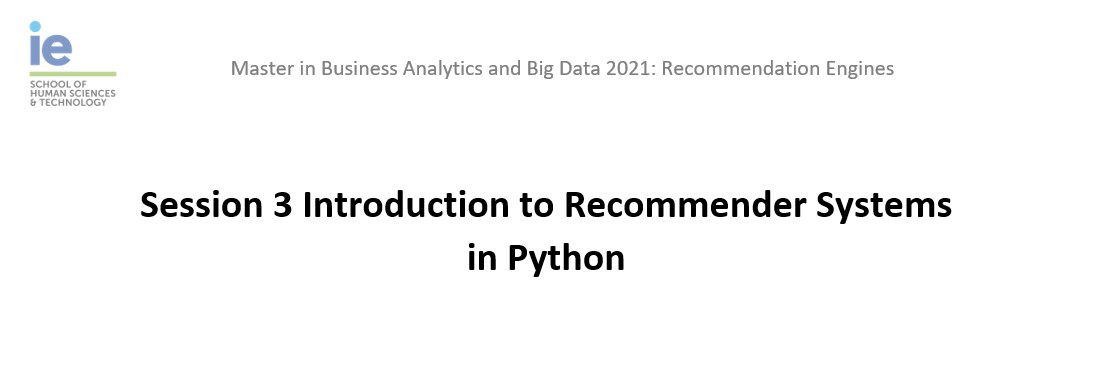

In [132]:
import pandas as pd

# Data preparation

The 100k MovieLens ratings data set. The data was collected through the [MovieLens web site](http://movielens.umn.edu) during the seven-month period from September 19th, 1997 through April 22nd, 1998. The research group in charge, GroupLens, also made available a richer data set, containing millions of recommendation, [check available data sets](https://grouplens.org/datasets/movielens/). There is a csv (ratings) which contains about 100,000 ratings (1-5). Movie metadata is also provided in csv movies. It contains the title, year, IMDb URL and indicator variables for 19 genres for each movie.



## MovieLens datasets

In [133]:
#Change the path
movielens = pd.read_csv('/Users/andrea/Documents/IE MBD/Recommendation Engine/S3/ratings.csv')
movielens.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [134]:
movielens_meta = pd.read_csv('/Users/andrea/Documents/IE MBD/Recommendation Engine/S3/movies.csv')
movielens_meta.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [135]:
data_merged = movielens.merge(movielens_meta,on='movieId', how='left')
data.head(10)

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
5,1,70,3.0,964982400,From Dusk Till Dawn (1996),Action|Comedy|Horror|Thriller
6,1,101,5.0,964980868,Bottle Rocket (1996),Adventure|Comedy|Crime|Romance
7,1,110,4.0,964982176,Braveheart (1995),Action|Drama|War
8,1,151,5.0,964984041,Rob Roy (1995),Action|Drama|Romance|War
9,1,157,5.0,964984100,Canadian Bacon (1995),Comedy|War


### Exercise
How many movies are in the dataset?

In [136]:
#Insert your code here
data_merged['movieId'].nunique()

9724

How many users are in the dataset?

In [137]:
#Insert your code here
data_merged['userId'].nunique()

610

# Rating representation

## **Exercise**
 
Write a code that converts the MovieLense into a matrix as described in session 2 where each pair user-movie rating represents the rating given by $\text{user}_i$ to $\text{movie}_j$ and:
- rows (index $i$) represent users 
- columns (index $j$) represent movies

Hint: Use the function pivot_table

In [150]:
## insert your code here
data_pivot = movielens.pivot_table(index = 'userId', columns ='movieId', values = 'rating')
data_pivot.fillna(0, inplace = True) #beautify
data_pivot.head(3)

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Exploratory data analysis (EDA)




The ratings are numbers in the range 0-5. Let's count the occurrences of each of them.

In [139]:
data['rating'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: rating, dtype: int64

### Exercise

Now, we can build a frequency plot of the ratings.

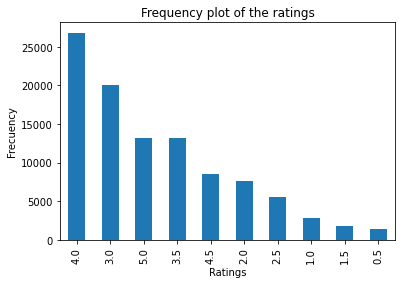

In [140]:
#insert your code here
import matplotlib.pyplot as plt
import numpy as np
data_merged['rating'].value_counts().plot(kind='bar')
plt.xlabel('Ratings')
plt.ylabel('Frecuency')
plt.title('Frequency plot of the ratings')
plt.show()

## Exploring rated movies

For instance, which are the most viewed movies? We can use groupby and agg for this
purpose. First, let's count the views for each movie:


In [141]:
views_per_movie = pd.DataFrame(data_merged.groupby('title').agg(Total_Ratings=('rating','count')))
views_per_movie.head(10)

,Total_Ratings
title,
'71 (2014),1
'Hellboy': The Seeds of Creation (2004),1
'Round Midnight (1986),2
'Salem's Lot (2004),1
'Til There Was You (1997),2
'Tis the Season for Love (2015),1
"'burbs, The (1989)",17
'night Mother (1986),1
(500) Days of Summer (2009),42


### Exercise
Then, we can sort the movies by number of views. Get the 5 most rated films

In [142]:
#insert your code here
views_per_movie.sort_values("Total_Ratings",ascending = False).head(10)

,Total_Ratings
title,
Forrest Gump (1994),329
"Shawshank Redemption, The (1994)",317
Pulp Fiction (1994),307
"Silence of the Lambs, The (1991)",279
"Matrix, The (1999)",278
Star Wars: Episode IV - A New Hope (1977),251
Jurassic Park (1993),238
Braveheart (1995),237
Terminator 2: Judgment Day (1991),224


### Exercise
Plot a histogram with the number of ratings

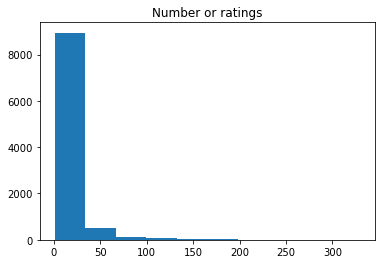

In [143]:
#insert your code here
plt.hist(views_per_movie)
plt.title('Number or ratings')
plt.show()

## Exploring average rating per user

### Exercise
In previous section we explored movie average ratings, in this section you will need to repeat what we did in the above section with the ratings per user:
- Count views per user
- Order them
- Plot a histogram


In [144]:
#insert your code here
count_views_per_user = pd.DataFrame(data_merged.groupby('userId').agg(rating_count=('rating','count')))
count_views_per_user.head(10)

,rating_count
userId,
1,232
2,29
3,39
4,216
5,44
6,314
7,152
8,47
9,46


In [145]:
#insert your code here
#order them
data_merged.sort_values("rating",ascending = False).head(10)

,userId,movieId,rating,timestamp,title,genres
34031,232,3147,5.0,1218164903,"Green Mile, The (1999)",Crime|Drama
50717,328,1080,5.0,1494210450,Monty Python's Life of Brian (1979),Comedy
18166,115,487,5.0,944951378,Lightning Jack (1994),Comedy|Western
18165,115,480,5.0,944953733,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller
76157,479,3308,5.0,1039362558,"Flamingo Kid, The (1984)",Comedy|Drama
18158,115,296,5.0,944954937,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
18157,115,260,5.0,959800922,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi
50696,328,608,5.0,1494210682,Fargo (1996),Comedy|Crime|Drama|Thriller
50698,328,750,5.0,1494210377,Dr. Strangelove or: How I Learned to Stop Worr...,Comedy|War
50699,328,858,5.0,1494206973,"Godfather, The (1972)",Crime|Drama


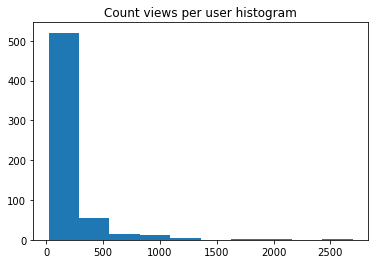

In [146]:
#insert your code here
plt.hist(count_views_per_user)
plt.title('Count views per user histogram')
plt.show()

## Bonus track

Please use this section to add any other analysis that you consider relevant. 
Suggestion, you can use a different dataset Idea
